In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

In [2]:
N = 1000; Ne = int( 0.8*N ); Ni = int( 0.2*N );

T = 4; # total time we want to simulate, 4 s
dt = 0.001; # 1 ms temporal resolution

time = np.linspace(dt,T, int(T/dt)) # time in ms

In [3]:
# decide which 20% neurons are inhibitory
inhibitory_indx = np.sort(np.random.choice(range(N),Ni,replace=False))
inhibitory_indx

array([  0,   5,   9,  20,  26,  28,  32,  35,  37,  42,  48,  55,  59,
        60,  66,  81,  91,  96,  99, 101, 110, 120, 122, 129, 140, 141,
       142, 143, 158, 166, 170, 176, 179, 197, 199, 202, 208, 209, 210,
       216, 219, 226, 227, 233, 236, 239, 240, 245, 248, 251, 252, 257,
       266, 271, 275, 277, 278, 286, 291, 302, 311, 335, 338, 340, 344,
       347, 348, 350, 354, 355, 363, 376, 380, 381, 382, 389, 397, 401,
       410, 411, 415, 417, 426, 433, 439, 442, 448, 453, 455, 457, 463,
       473, 474, 475, 477, 486, 490, 500, 504, 517, 518, 520, 521, 535,
       540, 548, 554, 556, 557, 566, 574, 575, 583, 584, 588, 592, 596,
       603, 609, 610, 626, 630, 639, 643, 644, 645, 647, 650, 651, 653,
       660, 670, 671, 675, 676, 678, 682, 686, 688, 690, 693, 695, 700,
       708, 712, 720, 731, 744, 750, 763, 776, 778, 783, 788, 789, 794,
       795, 800, 805, 807, 810, 814, 820, 822, 823, 828, 831, 835, 836,
       837, 838, 842, 844, 845, 856, 874, 875, 881, 882, 885, 89

In [4]:
J0 = 0.3; J1 = 0.4; l = 0.2
sigma = 1.8

# i-d array, storing the position of each neuron
positions = np.linspace(0,1,N,endpoint=False)

# pre-define Jij_ex
Jij_ex = np.zeros([N, N])

In [5]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

In [6]:
# Equ. 8
def sigma_ij_comp(i,j,sigma):
    if i<j:
        result = 1
    else:
        result = sigma
    return result

In [7]:
def Jij_ex_comp(i, j):
    sigma_ij = sigma_ij_comp(i,j,sigma)
    result = sigma_ij * J1 * np.exp(-np.abs(positions[i]-positions[j])/l)
    return result

In [8]:
def Jij_in_comp(i, j):
    sigma_ij = sigma_ij_comp(i,j,sigma)
    result = sigma_ij * J2 * np.exp(-np.abs(positions[i]-positions[j])/l)
    return result

In [9]:
x0 = time/len(time)
I0 = 1.02
lambda_e = 0.03
lambda_i = 0.02
Vres = 0.85
theta = 1
J2 = 0.02
s_ex = 0.2
s_in = 0.7

In [10]:
# compute each element of Jij_ex, treat Jij_ex as a constant matrix
for ii in range(N):
    for jj in range(N):
        Jij_ex[ii,jj] = Jij_ex_comp(ii,jj)
    
Jij_ex

array([[0.72      , 0.39800499, 0.39601993, ..., 0.00273591, 0.00272227,
        0.00270869],
       [0.71640899, 0.72      , 0.39800499, ..., 0.00274963, 0.00273591,
        0.00272227],
       [0.71283588, 0.71640899, 0.72      , ..., 0.00276341, 0.00274963,
        0.00273591],
       ...,
       [0.00492464, 0.00494933, 0.00497413, ..., 0.72      , 0.39800499,
        0.39601993],
       [0.00490008, 0.00492464, 0.00494933, ..., 0.71640899, 0.72      ,
        0.39800499],
       [0.00487564, 0.00490008, 0.00492464, ..., 0.71283588, 0.71640899,
        0.72      ]])

In [11]:
# compute each element of Jij_in, treat Jij_in as a constant matrix
Jij_in = np.zeros([N, N])
for ii in range(N):
    for jj in range(N):
        Jij_in[ii,jj] = Jij_in_comp(ii,jj)
    
Jij_in

array([[0.036     , 0.01990025, 0.019801  , ..., 0.0001368 , 0.00013611,
        0.00013543],
       [0.03582045, 0.036     , 0.01990025, ..., 0.00013748, 0.0001368 ,
        0.00013611],
       [0.03564179, 0.03582045, 0.036     , ..., 0.00013817, 0.00013748,
        0.0001368 ],
       ...,
       [0.00024623, 0.00024747, 0.00024871, ..., 0.036     , 0.01990025,
        0.019801  ],
       [0.000245  , 0.00024623, 0.00024747, ..., 0.03582045, 0.036     ,
        0.01990025],
       [0.00024378, 0.000245  , 0.00024623, ..., 0.03564179, 0.03582045,
        0.036     ]])

In [12]:
# Equ. 9
I_ext_ex = np.zeros([Ne, len(time)])

for i in range(Ne):
    for t in range(len(time)):
        I_ext_ex[i,t] = I0 * (1 + lambda_e*np.exp(-np.abs(positions[i]-x0[t])/l))
I_ext_ex

array([[1.05059996, 1.05059992, 1.05059989, ..., 1.05044746, 1.05044742,
        1.05044738],
       [1.05044742, 1.05044746, 1.0504475 , ..., 1.05059992, 1.05059996,
        1.0506    ],
       [1.05029556, 1.0502956 , 1.05029564, ..., 1.05044731, 1.05044734,
        1.05044738],
       ...,
       [1.02056893, 1.02056893, 1.02056893, ..., 1.02057178, 1.02057178,
        1.02057178],
       [1.02056609, 1.02056609, 1.02056609, ..., 1.02056893, 1.02056893,
        1.02056893],
       [1.02056327, 1.02056327, 1.02056327, ..., 1.02056609, 1.02056609,
        1.02056609]])

In [13]:
# Equ. 10
I_ext_in = np.zeros(len(time))

for t in range(len(time)):
    I_ext_in[t] = I0 * (1 + lambda_i * np.cos(2*np.pi*time[t]*6)) # 6-9 Hz

I_ext_in

array([1.04038551, 1.04034204, 1.04026967, ..., 1.04034204, 1.04038551,
       1.0404    ])

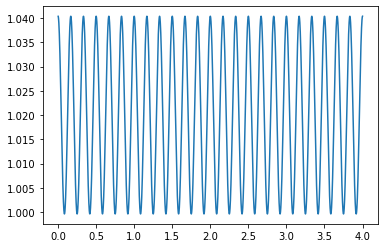

In [14]:
plt.plot(time, I_ext_in)

In [15]:
# I_ext = combine I_ext_ex and I_ext_in
I_ext = np.zeros([N, len(time)])
cnt_ex = 0
cnt_in = 0
for i in range(N):
    if i in inhibitory_indx:
        I_ext[i,:] = I_ext_in
        cnt_in = cnt_in + 1
    else:
        I_ext[i,:] = I_ext_ex[cnt_ex,:]
        cnt_ex = cnt_ex + 1

In [16]:
def delta_kronecker(delta_t):
    if delta_t == 0:
        return 1
    else:
        return 0

In [17]:
# compute I_ex and I_in
I_ex = np.zeros([N, len(time)])
I_in = np.zeros([N, len(time)])

t_spike = np.zeros([N, len(time)])

Is = np.zeros([N, len(time)])

V = np.zeros([N, len(time)])
V[:,0] = Vres

In [18]:
tau_ex = 6/1000
tau_in = 4/1000
tau = 20/1000

In [19]:
def integrate_and_fire(V, t_spike_time, t, Is):
    dV = dt*(-V[:,t-1] + Is[:,t-1] + I_ext[:,t-1])/tau
    V[:,t] = V[:,t-1] + dV
    for i in range(N):
        if V[i,t]>theta:
            t_spike_time[i,t] = 1
            V[i,t] = Vres
            
        if i in inhibitory_indx:
            I_in[i,t] = I_in[i,t-1] + dt*(-I_in[i,t-1]/tau_in + s_in*np.dot(Jij_in[i,:],t_spike_time[:,t-1]))
        else:
            I_ex[i,t] = I_ex[i,t-1] + dt*(-I_ex[i,t-1]/tau_ex + s_ex*np.dot(Jij_ex[i,:],t_spike_time[:,t-1]))
            
    Is = I_ex - I_in
    
    return V, t_spike_time, Is

In [20]:
for t in range(1,len(time)):
    V, t_spike, Is = integrate_and_fire(V, t_spike, t, Is)
    

In [21]:
t_spike

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])